In [16]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [19]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = []
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [20]:
#  3. Convert the June temperatures to a list.
temps_june = list(np.ravel(results_june))

In [21]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(results_june, columns = ['date', 'tobs'])
df_june.set_index(df_june['date'], inplace=True)

In [22]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [58]:
print(df_june)

                  date  tobs
date                        
2010-06-01  2010-06-01  78.0
2010-06-02  2010-06-02  76.0
2010-06-03  2010-06-03  78.0
2010-06-04  2010-06-04  76.0
2010-06-05  2010-06-05  77.0
...                ...   ...
2017-06-26  2017-06-26  79.0
2017-06-27  2017-06-27  74.0
2017-06-28  2017-06-28  74.0
2017-06-29  2017-06-29  76.0
2017-06-30  2017-06-30  75.0

[1700 rows x 2 columns]


## D2: Determine the Summary Statistics for December

In [23]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = []
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [24]:
# 7. Convert the December temperatures to a list.
temps_dec = list(np.ravel(results_dec))

In [25]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(results_dec, columns = ['date', 'tobs'])
df_dec.set_index(df_dec['date'], inplace=True)

In [26]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [27]:
results_prcp_june =[]
results_prcp_june = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

df_june_prcp = pd.DataFrame(results_prcp_june, columns = ['date', 'prcp'])
df_june_prcp.set_index(df_june_prcp['date'], inplace=True)

In [28]:
df_june_prcp.describe()

,prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [60]:
df_june_prcp

,date,prcp
date,,
2010-06-01,2010-06-01,0.00
2010-06-02,2010-06-02,0.01
2010-06-03,2010-06-03,0.00
2010-06-04,2010-06-04,0.00
2010-06-05,2010-06-05,0.00
...,...,...
2017-06-26,2017-06-26,0.02
2017-06-27,2017-06-27,0.10
2017-06-28,2017-06-28,0.02


In [63]:
df_june_prcp.to_csv('df_june_prcp.csv', encoding='utf-8')

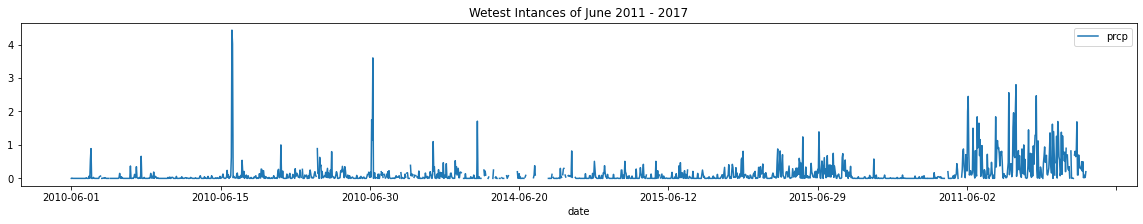

In [67]:
df_june_prcp.plot(figsize=(20,3))
plt.title("Wetest Intances of June 2011 - 2017")
plt.savefig("June Precip.png")
#plt.show()
#plt.tight_layout()

In [49]:
results_prcp_dec =[]
results_prcp_dec = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

df_dec_prcp = pd.DataFrame(results_prcp_dec, columns = ['date', 'prcp'])
df_dec_prcp.set_index(df_dec_prcp['date'], inplace=True)

In [50]:
df_dec_prcp.describe()

,prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


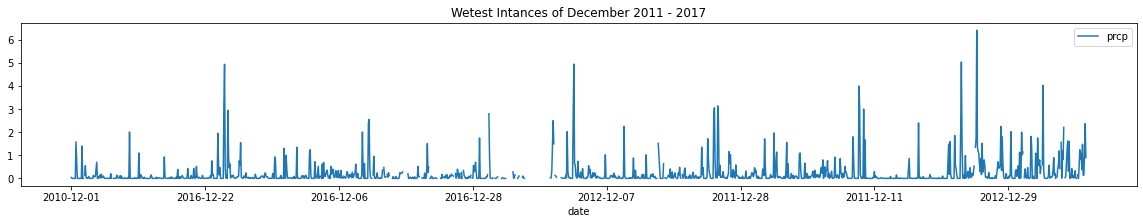

In [66]:
df_dec_prcp.plot(figsize=(20,3))
plt.title("Wetest Intances of December 2011 - 2017")
plt.savefig("December Precip.png")